# Visualisations avancées avec seaborn

Au cours de vos lectures, vous avez vus comment utiliser `seaborn` pour faire différentes visualisations. Ce notebook va vous montrer des exemples plus avancées où l'on s'assure de respecter les bonnes pratiques de visualisation. Ce notebook peut vous être pratique pour votre projet. Commençons par importer les librairies pertinentes et le jeu de données.

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/data/salesCerealsOriginal.csv'
df = pd.read_csv(url, parse_dates=['WEEK_END_DATE'])
df['UPC_string'] = ["UPC" + str(x) for x in df['UPC']]
df['MARKDOWN'] = (df['BASE_PRICE'] - df['PRICE']) / df['BASE_PRICE'] * 100
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,UPC_string,MARKDOWN
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,UPC1111085319,0.000000
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,UPC1111085350,0.000000
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027527,0.000000
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027528,0.000000
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027564,11.400651


## Diagramme à barres

Revenons maintenant sur la figure ci-dessous du chapitre à lire. Celle-ci enfrain quelques bonnes pratiques, même si elle n'est pas si mal.

<Axes: title={'center': 'Total number of units sold per UPC'}, xlabel='UNITS', ylabel='UPC_string'>

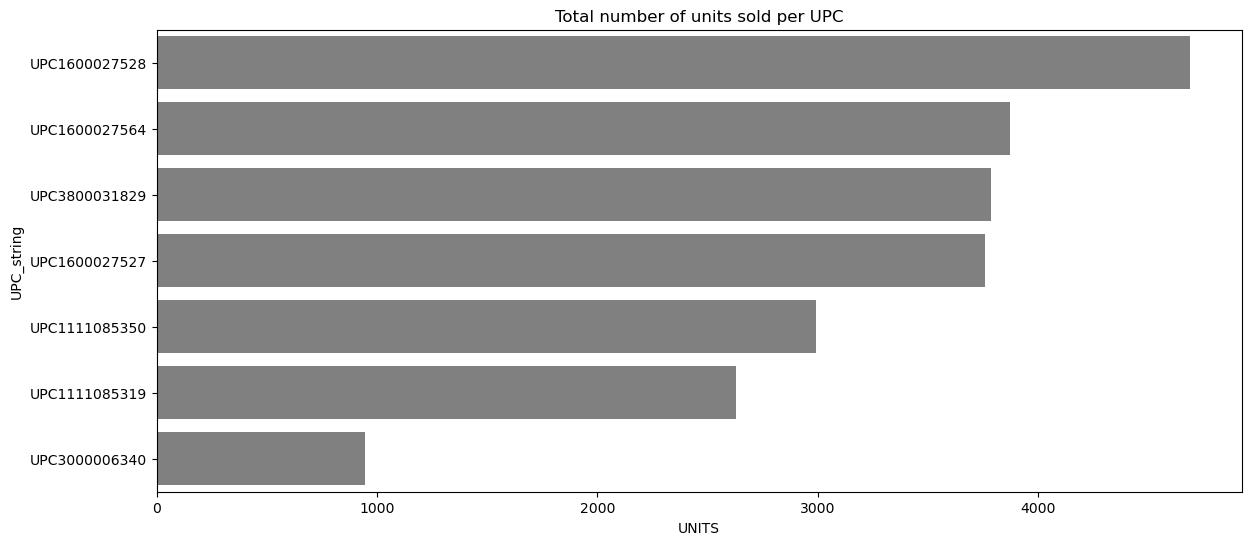

In [2]:
temp = df.groupby('UPC_string').UNITS.sum().reset_index()
temp.sort_values(by='UNITS', ascending=False, inplace=True)
plt.figure(figsize=(14, 6))
plt.title('Total number of units sold per UPC')
sns.barplot(y=temp.UPC_string, x=temp.UNITS, color='grey')

Disons que je voudrais mettre en évidence les ventes de l'UPC 1600027527 par rapport aux ventes des autres UPC, tout en suivant les meilleures pratiques de visualisation. Est-ce possible avec seaborn?

Oui, voir ci-dessous! Mais du code supplémentaire est nécessaire! Reportez-vous aux commentaires du code pour comprendre ce que fait chaque morceau de code.

In [3]:
# Ajoute une colonne à temp en spécifiant la couleur de chaque barre
# Pour les noms des couleurs, regardez https://matplotlib.org/3.1.0/gallery/color/named_colors.html
temp['CLRS'] = temp.apply(
    lambda x: 'deepskyblue'
    if x.UPC_string == 'UPC1600027527' else 'grey', axis='columns')

temp

,UPC_string,UNITS,CLRS
3,UPC1600027528,4690,grey
4,UPC1600027564,3871,grey
6,UPC3800031829,3788,grey
2,UPC1600027527,3760,deepskyblue
1,UPC1111085350,2994,grey
0,UPC1111085319,2631,grey
5,UPC3000006340,945,grey


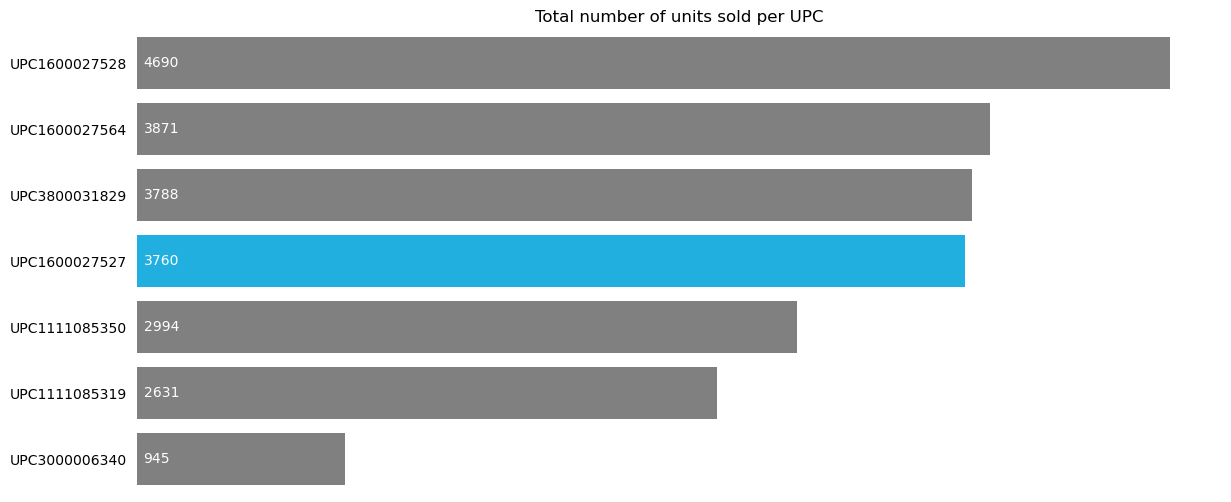

In [4]:
# Génère la figure
plt.figure(figsize=(14, 6))
g = sns.barplot(data=temp, x='UNITS', y='UPC_string', palette=temp.CLRS)

# Ajoute des valeurs dans les barres
# Regardez https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
for p in g.patches:
    x = p.get_x() + 30
    y = p.get_y() + p.get_height() / 2
    value = int(p.get_width())
    g.text(x, y, value, ha='left', va='center', color='white')

# Réorganise les axes x et y
# Regardez https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
plt.tick_params(
    axis='x',          # les modifications s'appliquent à l'axe des x
    which='both',      # les marques majeures et mineures sont affectées
    bottom=False,      # les marques le long du bord inférieur sont désactivées
    top=False,         # les marques le long du bord supérieur sont désactivées
    labelbottom=False) # les étiquettes le long du bord inférieur sont désactivées
plt.xlabel('')
plt.tick_params(
    axis='y',          # les modifications s'appliquent à l'axe des y
    which='both',      # les marques majeures et mineures sont affectées
    left=False,        # les marques le long du bord gauche sont désactivées
    right=False,       # les marques le long du bord droit sont désactivées
    labelleft=True)    # les étiquettes le long du bord gauche sont activées
plt.ylabel('')

# Définit le titre
plt.title('Total number of units sold per UPC')

# Retire la boîte autour de la figure
# Regardez https://stackoverflow.com/questions/22016965/removing-frame-while-keeping-axes-in-pyplot-subplots
plt.box(on=None)

## Nuage de points avec régressions
Dans le chapitre, nous avions aussi vu la figure suivante qui peut être améliorée.

<Axes: title={'center': 'Number of units sold and markdown in percentage\n(with indication of whether the item is featured in the circular)'}, xlabel='MARKDOWN', ylabel='UNITS'>

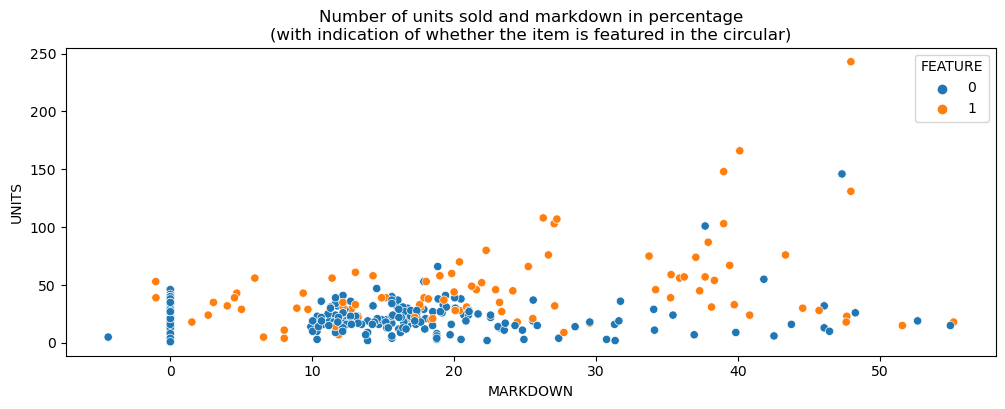

In [5]:
plt.figure(figsize=(12,4))
plt.title('Number of units sold and markdown in percentage\n'
          '(with indication of whether the item is featured in the circular)')
sns.scatterplot(data=df, x='MARKDOWN', y='UNITS', hue='FEATURE')

Commençons par ajouter des lignes de régression au graphique précédent. Cela peut être fait avec la fonction `sns.lmplot()`. Notez que la définition de la taille de `lmplot` est différente des autres figures.

Notez également que j'ai définie manuellement la léagende du graphique. Je trouve cette nouvelle légende plus descriptive que celle ci-dessus.

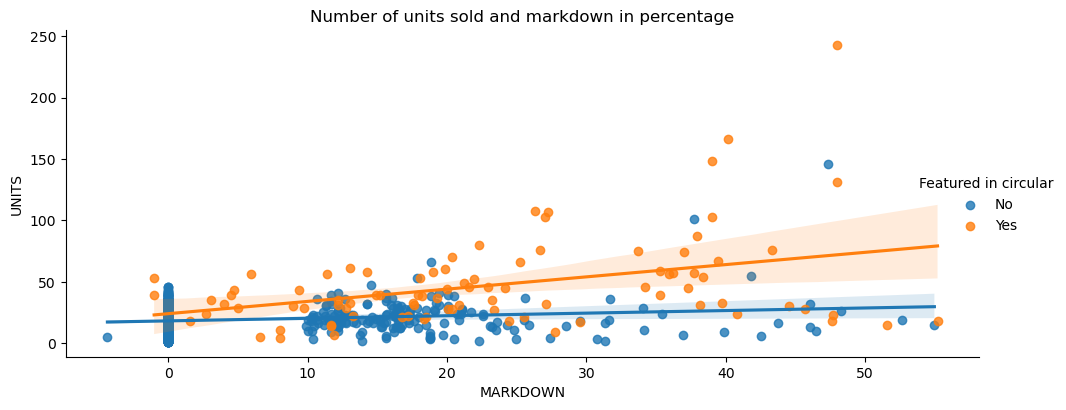

In [6]:
# La définition de la taille de lmplot est différente
# Regardez https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize/35949149
g = sns.lmplot(data=df, x='MARKDOWN', y='UNITS', hue='FEATURE', height=4, 
               aspect=2.5)
plt.title('Number of units sold and markdown in percentage')

# Définit la légende
# Regardez https://stackoverflow.com/questions/45201514/edit-seaborn-legend
g._legend.set_title('Featured in circular')
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

Il est également possible de supprimer la légende et de mettre les étiquettes directement à côté des lignes.

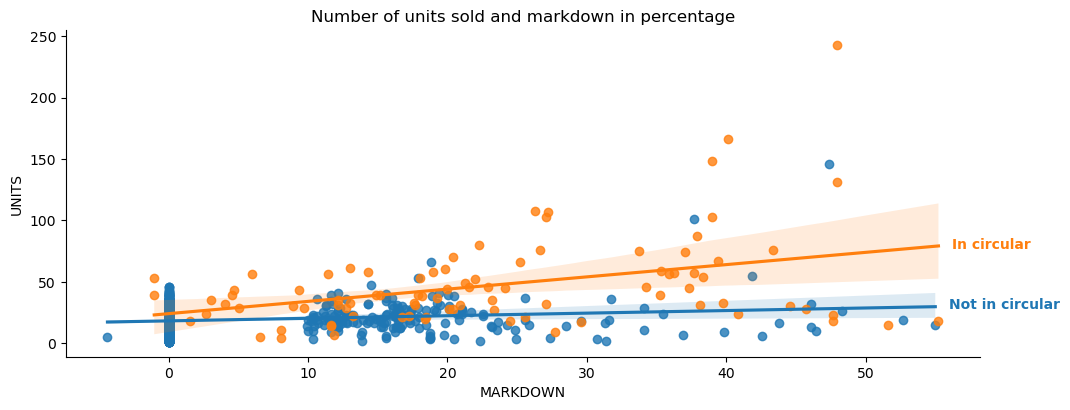

In [7]:
# La définition de la taille de lmplot est différente
# Regardez https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize/35949149
g = sns.lmplot(data=df, x='MARKDOWN', y='UNITS', hue='FEATURE', legend=False, 
               height=4, aspect=2.5)
plt.title('Number of units sold and markdown in percentage')

# Ajoute des étiquettes sous forme de texte dans la figure
# Regardez https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/
# Regardez https://stackoverflow.com/questions/33490833/display-regression-equation-in-seaborn-regplot
current_palette = sns.color_palette()  # obtient la palette de couleurs actuelle
axes = g.axes.flatten()
for i, txt in enumerate(['Not in circular', 'In circular']):  # pour les deux lignes
    x = axes[0].get_lines()[i].get_xdata()[-1]  # obtient la dernière position en x de la ligne
    y = axes[0].get_lines()[i].get_ydata()[-1]  # obtient la dernière position en y de la ligne
    axes[0].text(x+1, y-2, txt, color=current_palette[i],  # définit les étiquettes
                 horizontalalignment='left', size='medium', weight='semibold')

Nous voyons donc que ces ventes sont quelque peu différentes entre les articles des circulaires et les autres (même pour des réductions comparables). Jetons maintenant un œil à la répartition des ventes (en unités) pour les articles en circulaires et autres articles. Cela peut être fait avec `sns.swarmplot()` par exemple.

c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


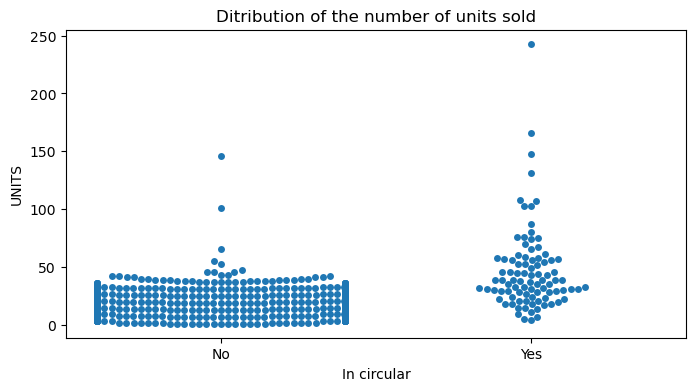

In [10]:
plt.figure(figsize=(8,4))
plt.title('Ditribution of the number of units sold')

g = sns.swarmplot(x=df['FEATURE'], y=df['UNITS'])

# Définit l'étiquette de l'axe des x et les étiquettes des marques
plt.xlabel('In circular')
g.set_xticks(g.get_xticks())
g.set_xticklabels(['No', 'Yes'])

# Bullet graph
Il est aussi possible de venir ajouter plusieurs informations contextuelles à des diagrammes à barres (p. ex., indication de la performance, comparaison par rapport à l'année précédente). Ces nouveaux diagrammes sont appelés des *bullet graphs*. Voici une fonction qui permet de générer de tels *bullet graphs* avec `seaborn`.

In [11]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ 
    Construit un bullet graph. Adapté de https://pbpython.com/bullet-graph.html
    Paramètres:
        data: liste des étiquettes, valeurs et cibles
        limits: liste des valeurs des intervalles
        labels: liste des étiquettes des intervalles
        axis_label: str, étiquette de l'axe des x
        title: str, titre de la figure
        size: tuple, dimension de la figure
        palette: palette seaborn, pour les intervalles
        formatter: formatteur matplotlib, pour l'axe des x
        target_color: str, couleur pour la ligne cible
        bar_color: str, couleur pour la petite barre
        label_color: str, couleur pour les étiquettes des intervalles
    Renvoie:
        une figure matplotlib
    """
    # Détermine la valeur maximale pour ajuster la hauteur des barres
    # Diviser par 15 semble bien fonctionner
    h = limits[-1] / 15

    # La palette verte semble une bonne valeur par défaut
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Pour être en mesure de gérer un ou plusieurs bullet graphs
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Ajouter chaque bullet graph à un subplot
    for idx, item in enumerate(data):
        
        # Obtenir l'axe correspondant à ce bullet graph
        if len(data) > 1:
            ax = axarr[idx]

        # Enlever le superflue pour améliorer le ratio donnée-encre
        ax.set_aspect('equal')
        ax.set_yticks([1])
        ax.set_yticklabels([item[0]])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Dessiner la barre de chaque intervalle
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        
        # Dessiner la valeur que nous mesurons
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Dessiner la valeur cible
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .6, ymax * .6, linewidth=1.5, color=target_color)

    # Ajouter les étiquettes
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)
    
def thousands(x, pos):
    """
    Ajoute le séparateur par millier et enlève les décimales.
    Doit avoir 2 paramètres selon matplotlib.
    """
    return f"{x:,.0f}"

# pour ajouter un séparateur de millier aux étiquettes
thousands_fmt = FuncFormatter(thousands)

Avec cette fonction, nous obtenons la figure ci-dessous. Dans cette figure, la barre noire horizontale montre le cumul annuel des ventes jusqu'à ce jour. Puis, les trois régions grises montrent respectivement une mauvaise valeur, une valeur adéquate et une excellente valeur de vente. Ces trois régions pourraient bien-sûr différer d'un produit à l'autre (en modifiant la fonction ci-dessus). Finalement, la barre verticale noire représente les ventes cumulées à pareille date l'année dernière. Cette barre sert de point de comparaison pour vérifier si l'année courante est meilleure que l'année dernière.

[['UPC1600027528', 4690], ['UPC1600027564', 3871], ['UPC3800031829', 3788], ['UPC1600027527', 3760], ['UPC1111085350', 2994], ['UPC1111085319', 2631], ['UPC3000006340', 945]]
[('UPC1600027528', 4690, 3850), ('UPC1600027564', 3871, 3232), ('UPC3800031829', 3788, 3647), ('UPC1600027527', 3760, 3170), ('UPC1111085350', 2994, 3474), ('UPC1111085319', 2631, 2145), ('UPC3000006340', 945, 959)]


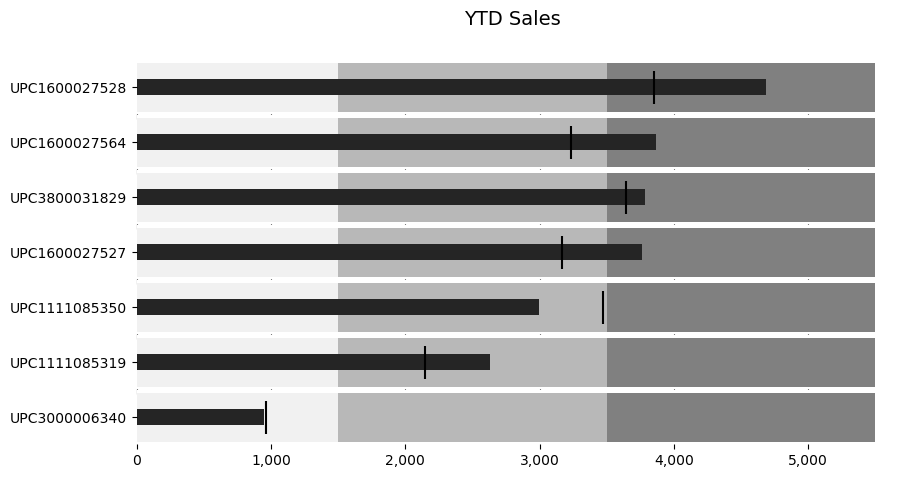

In [22]:
temp = df.groupby('UPC_string').UNITS.sum().reset_index()
temp.sort_values(by='UNITS', ascending=False, inplace=True)
# On supplémente les données du diagramme à barre avec une valeur de 
# comparaison pour l'année dernière (générée de façon aléatoire)
random.seed(123)  # fixe la graine aléatoire
data_to_plot = temp.values.tolist()  # extrait les données
data_to_plot = [(x[0], x[1], round(x[1] * random.uniform(0.8, 1.2)))
                for x in data_to_plot]  # réorganise les données

palette = sns.light_palette("grey", 3, reverse=False)  # palette de couleur
# Appel de la fonction en limitant le nombre d'étiquettes
bulletgraph(data_to_plot, limits=[1500, 3500, 5500],
            labels=["", "", ""], size=(10,5),
            axis_label="", label_color="black",
            bar_color="#252525", target_color='black', palette=palette,
            title="YTD Sales", formatter=thousands_fmt)